In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request


In [2]:

# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))


Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_gk = pd.read_csv('final_gk.csv')
gk_pas_2023=pd.read_csv('gk_pas_2023.csv')
gk_pas_2022=pd.read_csv('gk_pas_2022.csv')
gk_pas_2021=pd.read_csv('gk_pas_2021.csv')
newbie=pd.read_csv('newbie.csv')
# Fill missing values with 0 in place
final_gk.fillna(0, inplace=True)
gk_pas_2023.fillna(0, inplace=True)
gk_pas_2022.fillna(0, inplace=True)
gk_pas_2021.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Gianluigi Donnarumma,it ITA,GK,Milan+Paris S-G,it Serie A+fr Ligue 1,24.0,1999.0,92.0,92.0,8269.0,91.9,95.0,1.03,347.0,253.0,73.0,64.0,12.0,16.0,32.0,35.0,10.0,5.0,2.0,1.0,20.0,3.0,12.0,3.0,96.5,0.28,4.500000e+00,0.05,226.0,560.0,40.0,2123.0,423.0,20.0,24.970,509.0,27.0,26.50,1168.0,73.0,6.0,77.0,1.13,45.30,136.0,419.0,2214.0,2636.0,84.0,48848.0,33469.0,677.0,680.0,100.0,1058.0,1077.0,98.0,460.0,853.0,54.0,0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,1.0,0.01,0.00,2379.0,2827.0,16.0,2840.0,1776.0,1341.0,0.00,0.00,0.00,0.00,0.00,0.00,3,0,0,1,2,0,0.00
1,1,Alban Lafont,fr FRA,GK,Nantes,fr Ligue 1,24.0,1999.0,113.0,113.0,10169.0,113.0,157.0,1.39,502.0,347.0,69.0,31.0,37.0,45.0,24.0,21.0,28.0,23.0,4.0,1.0,14.0,3.0,19.0,6.0,158.4,0.32,7.400000e+00,0.07,594.0,1764.0,34.0,2630.0,470.0,44.0,38.200,792.0,75.0,53.20,1491.0,92.0,6.0,92.0,1.16,42.10,597.0,1163.0,2172.0,3429.0,63.0,68999.0,54980.0,298.0,301.0,99.0,969.0,989.0,98.0,901.0,2125.0,42.0,0,0.1,0.3,-0.1,1.0,61.0,2.0,0.0,1.0,1.0,11.0,0.10,0.00,3138.0,3768.0,21.0,3788.0,2093.0,1474.0,0.01,0.01,0.01,0.01,0.01,0.01,3,0,0,0,3,0,0.01
2,2,Rui Patrício,pt POR,GK,Wolves+Roma,eng Premier League+it Serie A,35.0,1988.0,110.0,110.0,9899.0,110.0,129.0,1.17,402.0,276.0,69.0,47.0,26.0,37.0,38.0,35.0,17.0,14.0,3.0,0.0,18.0,4.0,17.0,6.0,115.1,0.29,-7.900000e+00,-0.07,469.0,1104.0,42.0,2038.0,408.0,39.0,34.430,730.0,41.0,34.37,1353.0,49.0,4.0,38.0,0.57,38.70,302.0,800.0,2067.0,2778.0,74.0,57837.0,40732.0,412.0,414.0,100.0,880.0,892.0,99.0,757.0,1442.0,52.0,0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,2.0,0.0,11.0,0.10,0.00,2655.0,2936.0,4.0,2940.0,1483.0,1086.0,0.00,0.00,0.00,0.00,0.00,0.00,3,1,0,2,0,0,0.00
3,3,Alexander Schwolow,de GER,GK,Hertha BSC+Schalke 04,de Bundesliga,31.0,1992.0,74.0,73.0,6550.0,72.8,148.0,2.03,369.0,221.0,60.0,17.0,19.0,37.0,14.0,19.0,15.0,15.0,0.0,0.0,0.0,3.0,14.0,0.0,126.9,0.34,-2.110000e+01,-0.29,432.0,1062.0,41.0,1993.0,332.0,35.0,34.200,598.0,61.0,48.77,1098.0,34.0,3.0,51.0,1.02,44.50,366.0,693.0,1894.0,2605.0,73.0,57293.0,41676.0,260.0,261.0,100.0,892.0,902.0,99.0,736.0,1421.0,52.0,0,0.1,0.2,-0.1,2.0,42.0,2.0,0.0,1.0,0.0,12.0,0.16,0.00,2376.0,2784.0,10.0,2795.0,1477.0,1290.0,0.00,0.00,0.00,0.00,0.00,0.00,3,0,0,0,0,3,0.00
4,4,Paul Bernardoni,fr FRA,GK,Angers+Angers+Saint-Étienne,fr Ligue 1,26.0,1997.0,97.0,97.0,8730.0,97.0,176.0,1.81,421.0,251.0,60.0,22.0,23.0,52.0,19.0,20.0,25.0,23.0,1.0,0.0,4.0,4.0,22.0,6.0,152.2,0.36,-1.780000e+01,-0.18,3

In [4]:
# Create new columns by dividing existing columns by '90s'
columns_to_divide_by_90s = [ 'Touches_Def_Pen', 'Touches_Def_3rd', 'Touches_Mid_3rd', 
                             'Carries', 'Passes_Received']

for column in columns_to_divide_by_90s:
    final_gk[column + '_per_90'] = round(final_gk[column] / final_gk['90s'],2)

final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Gianluigi Donnarumma,it ITA,GK,Milan+Paris S-G,it Serie A+fr Ligue 1,24.0,1999.0,92.0,92.0,8269.0,91.9,95.0,1.03,347.0,253.0,73.0,64.0,12.0,16.0,32.0,35.0,10.0,5.0,2.0,1.0,20.0,3.0,12.0,3.0,96.5,0.28,4.500000e+00,0.05,226.0,560.0,40.0,2123.0,423.0,20.0,24.970,509.0,27.0,26.50,1168.0,73.0,6.0,77.0,1.13,45.30,136.0,419.0,2214.0,2636.0,84.0,48848.0,33469.0,677.0,680.0,100.0,1058.0,1077.0,98.0,460.0,853.0,54.0,0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,1.0,0.01,0.00,2379.0,2827.0,16.0,2840.0,1776.0,1341.0,25.89,30.76,0.17,0.00,19.33,14.59,3,0,0,1,2,0,0.00
1,1,Alban Lafont,fr FRA,GK,Nantes,fr Ligue 1,24.0,1999.0,113.0,113.0,10169.0,113.0,157.0,1.39,502.0,347.0,69.0,31.0,37.0,45.0,24.0,21.0,28.0,23.0,4.0,1.0,14.0,3.0,19.0,6.0,158.4,0.32,7.400000e+00,0.07,594.0,1764.0,34.0,2630.0,470.0,44.0,38.200,792.0,75.0,53.20,1491.0,92.0,6.0,92.0,1.16,42.10,597.0,1163.0,2172.0,3429.0,63.0,68999.0,54980.0,298.0,301.0,99.0,969.0,989.0,98.0,901.0,2125.0,42.0,0,0.1,0.3,-0.1,1.0,61.0,2.0,0.0,1.0,1.0,11.0,0.10,0.00,3138.0,3768.0,21.0,3788.0,2093.0,1474.0,27.77,33.35,0.19,0.01,18.52,13.04,3,0,0,0,3,0,0.01
2,2,Rui Patrício,pt POR,GK,Wolves+Roma,eng Premier League+it Serie A,35.0,1988.0,110.0,110.0,9899.0,110.0,129.0,1.17,402.0,276.0,69.0,47.0,26.0,37.0,38.0,35.0,17.0,14.0,3.0,0.0,18.0,4.0,17.0,6.0,115.1,0.29,-7.900000e+00,-0.07,469.0,1104.0,42.0,2038.0,408.0,39.0,34.430,730.0,41.0,34.37,1353.0,49.0,4.0,38.0,0.57,38.70,302.0,800.0,2067.0,2778.0,74.0,57837.0,40732.0,412.0,414.0,100.0,880.0,892.0,99.0,757.0,1442.0,52.0,0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,2.0,0.0,11.0,0.10,0.00,2655.0,2936.0,4.0,2940.0,1483.0,1086.0,24.14,26.69,0.04,0.00,13.48,9.87,3,1,0,2,0,0,0.00
3,3,Alexander Schwolow,de GER,GK,Hertha BSC+Schalke 04,de Bundesliga,31.0,1992.0,74.0,73.0,6550.0,72.8,148.0,2.03,369.0,221.0,60.0,17.0,19.0,37.0,14.0,19.0,15.0,15.0,0.0,0.0,0.0,3.0,14.0,0.0,126.9,0.34,-2.110000e+01,-0.29,432.0,1062.0,41.0,1993.0,332.0,35.0,34.200,598.0,61.0,48.77,1098.0,34.0,3.0,51.0,1.02,44.50,366.0,693.0,1894.0,2605.0,73.0,57293.0,41676.0,260.0,261.0,100.0,892.0,902.0,99.0,736.0,1421.0,52.0,0,0.1,0.2,-0.1,2.0,42.0,2.0,0.0,1.0,0.0,12.0,0.16,0.00,2376.0,2784.0,10.0,2795.0,1477.0,1290.0,32.64,38.24,0.14,0.00,20.29,17.72,3,0,0,0,0,3,0.00
4,4,Paul Bernardoni,fr FRA,GK,Angers+Angers+Saint-Étienne,fr Ligue 1,26.0,1997.0,97.0,97.0,8730.0,97.0,176.0,1.81,421.0,251.0,60.0,22.0,23.0,52.0,19.0,20.0,25.0,23.0,1.0,0.0,4.0,4.0,22.0,6.0,152.2,0.36,-1.780

In [5]:
final_gk.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Goals_Against', 'Goals_Against_per90',
       'Shots_on_Target_Against', 'Saves', 'Save%', 'W', 'D', 'L', 'CS', 'CS%',
       'PK_attempts', 'PK_Allowed', 'PKs_Saved', 'PK_missed',
       'Save%(Penalty Kicks)', 'Gk_free_kick_goals_against',
       'Gk_corner_kick_goals_against', 'Gk_own_goals_against', 'Gk_psxg',
       'Gk_psxg_per_shot_on_target_against', 'Gk_psxg_diff',
       'Gk_psxg_net_per90', 'Gk_passes_completed_launched',
       'Gk_passes_attempted_launched', 'Gk_passes_pct_launched', 'Gk_passes',
       'Gk_passes_throws', 'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
       'Gk_go

In [6]:
Onana=pd.read_csv('Onana_CL.csv')
Onana

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Shot_Creating_Action_per90,Goal_Creating_Action_per90,Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Tocuhes_Live_Balls,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Carries,Total_Distance,Progressive_Distance_Carried,Progressive_Carries,1/3_Carries,Carries_Penalty_Area,Miscontrols,Dispossessed,Passes_Received,Progressive_Passes_Received,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90
0,0,0,André Onana,cm CMR,GK,it Inter,Champions League,26,1996,13,13,1170,13.0,11,0.85,57,47,80.7,7,3,3,8,61.5,0,0,0,0,0,0,2,1,17.6,0.31,7.6,0.58,84,191,44.0,437,63,34.6,34.0,88,45.5,40.4,196,14,7.1,3,0.23,10.1,0,0,407,525,77.5,11545,8251,84,84,100.0,178,181,98.3,141,256,55.1,0,0.0,0.0,0.0,0,12,0,0,0,0.31,0.08,550,474,544,6,0,0,550,1,0,0.0,0,0.0,363,1696,1026,0,0,0,0,0,303,0,42.31,36.46,41.85,0.46,0.0,0.0,42.31,0.08,0.0,0.0,27.92,130.46,78.92,0.0,0.0,0.0,0.0,0.0,23.31,0.0


In [7]:
# Defining a function to check if a league is in the 'Comp' column
def check_league_in_comp(row, league):
    if league in row['Comp']:
        return 1
    else:
        return 0

# Adding the new columns
Onana['Seasons at top 5'] = 1
Onana['Seasons in PL'] = Onana.apply(lambda row: check_league_in_comp(row, 'eng Premier League'), axis=1)
Onana['Seasons in Liga'] = Onana.apply(lambda row: check_league_in_comp(row, 'es La Liga'), axis=1)
Onana['Seasons in Serie A'] = 1
Onana['Seasons in Ligue 1'] = Onana.apply(lambda row: check_league_in_comp(row, 'fr Ligue 1'), axis=1)
Onana['Seasons in Bundesliga'] = Onana.apply(lambda row: check_league_in_comp(row, 'de Bundesliga'), axis=1)
Onana

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Shot_Creating_Action_per90,Goal_Creating_Action_per90,Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Tocuhes_Live_Balls,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Carries,Total_Distance,Progressive_Distance_Carried,Progressive_Carries,1/3_Carries,Carries_Penalty_Area,Miscontrols,Dispossessed,Passes_Received,Progressive_Passes_Received,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,0,André Onana,cm CMR,GK,it Inter,Champions League,26,1996,13,13,1170,13.0,11,0.85,57,47,80.7,7,3,3,8,61.5,0,0,0,0,0,0,2,1,17.6,0.31,7.6,0.58,84,191,44.0,437,63,34.6,34.0,88,45.5,40.4,196,14,7.1,3,0.23,10.1,0,0,407,525,77.5,11545,8251,84,84,100.0,178,181,98.3,141,256,55.1,0,0.0,0.0,0.0,0,12,0,0,0,0.31,0.08,550,474,544,6,0,0,550,1,0,0.0,0,0.0,363,1696,1026,0,0,0,0,0,303,0,42.31,36.46,41.85,0.46,0.0,0.0,42.31,0.08,0.0,0.0,27.92,130.46,78.92,0.0,0.0,0.0,0.0,0.0,23.31,0.0,1,0,0,1,0,0


In [8]:
final_gk=final_gk[final_gk['90s']>=19]
final_gk=final_gk.reset_index(drop=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Gianluigi Donnarumma,it ITA,GK,Milan+Paris S-G,it Serie A+fr Ligue 1,24.0,1999.0,92.0,92.0,8269.0,91.9,95.0,1.03,347.0,253.0,73.0,64.0,12.0,16.0,32.0,35.0,10.0,5.0,2.0,1.0,20.0,3.0,12.0,3.0,96.5,0.28,4.500000e+00,0.05,226.0,560.0,40.0,2123.0,423.0,20.0,24.970,509.0,27.0,26.50,1168.0,73.0,6.0,77.0,1.13,45.30,136.0,419.0,2214.0,2636.0,84.0,48848.0,33469.0,677.0,680.0,100.0,1058.0,1077.0,98.0,460.0,853.0,54.0,0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,1.0,0.01,0.00,2379.0,2827.0,16.0,2840.0,1776.0,1341.0,25.89,30.76,0.17,0.00,19.33,14.59,3,0,0,1,2,0,0.00
1,1,Alban Lafont,fr FRA,GK,Nantes,fr Ligue 1,24.0,1999.0,113.0,113.0,10169.0,113.0,157.0,1.39,502.0,347.0,69.0,31.0,37.0,45.0,24.0,21.0,28.0,23.0,4.0,1.0,14.0,3.0,19.0,6.0,158.4,0.32,7.400000e+00,0.07,594.0,1764.0,34.0,2630.0,470.0,44.0,38.200,792.0,75.0,53.20,1491.0,92.0,6.0,92.0,1.16,42.10,597.0,1163.0,2172.0,3429.0,63.0,68999.0,54980.0,298.0,301.0,99.0,969.0,989.0,98.0,901.0,2125.0,42.0,0,0.1,0.3,-0.1,1.0,61.0,2.0,0.0,1.0,1.0,11.0,0.10,0.00,3138.0,3768.0,21.0,3788.0,2093.0,1474.0,27.77,33.35,0.19,0.01,18.52,13.04,3,0,0,0,3,0,0.01
2,2,Rui Patrício,pt POR,GK,Wolves+Roma,eng Premier League+it Serie A,35.0,1988.0,110.0,110.0,9899.0,110.0,129.0,1.17,402.0,276.0,69.0,47.0,26.0,37.0,38.0,35.0,17.0,14.0,3.0,0.0,18.0,4.0,17.0,6.0,115.1,0.29,-7.900000e+00,-0.07,469.0,1104.0,42.0,2038.0,408.0,39.0,34.430,730.0,41.0,34.37,1353.0,49.0,4.0,38.0,0.57,38.70,302.0,800.0,2067.0,2778.0,74.0,57837.0,40732.0,412.0,414.0,100.0,880.0,892.0,99.0,757.0,1442.0,52.0,0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,2.0,0.0,11.0,0.10,0.00,2655.0,2936.0,4.0,2940.0,1483.0,1086.0,24.14,26.69,0.04,0.00,13.48,9.87,3,1,0,2,0,0,0.00
3,3,Alexander Schwolow,de GER,GK,Hertha BSC+Schalke 04,de Bundesliga,31.0,1992.0,74.0,73.0,6550.0,72.8,148.0,2.03,369.0,221.0,60.0,17.0,19.0,37.0,14.0,19.0,15.0,15.0,0.0,0.0,0.0,3.0,14.0,0.0,126.9,0.34,-2.110000e+01,-0.29,432.0,1062.0,41.0,1993.0,332.0,35.0,34.200,598.0,61.0,48.77,1098.0,34.0,3.0,51.0,1.02,44.50,366.0,693.0,1894.0,2605.0,73.0,57293.0,41676.0,260.0,261.0,100.0,892.0,902.0,99.0,736.0,1421.0,52.0,0,0.1,0.2,-0.1,2.0,42.0,2.0,0.0,1.0,0.0,12.0,0.16,0.00,2376.0,2784.0,10.0,2795.0,1477.0,1290.0,32.64,38.24,0.14,0.00,20.29,17.72,3,0,0,0,0,3,0.00
4,4,Paul Bernardoni,fr FRA,GK,Angers+Angers+Saint-Étienne,fr Ligue 1,26.0,1997.0,97.0,97.0,8730.0,97.0,176.0,1.81,421.0,251.0,60.0,22.0,23.0,52.0,19.0,20.0,25.0,23.0,1.0,0.0,4.0,4.0,22.0,6.0,152.2,0.36,-1.780

In [9]:
Onana

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Shot_Creating_Action_per90,Goal_Creating_Action_per90,Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Tocuhes_Live_Balls,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Carries,Total_Distance,Progressive_Distance_Carried,Progressive_Carries,1/3_Carries,Carries_Penalty_Area,Miscontrols,Dispossessed,Passes_Received,Progressive_Passes_Received,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,0,André Onana,cm CMR,GK,it Inter,Champions League,26,1996,13,13,1170,13.0,11,0.85,57,47,80.7,7,3,3,8,61.5,0,0,0,0,0,0,2,1,17.6,0.31,7.6,0.58,84,191,44.0,437,63,34.6,34.0,88,45.5,40.4,196,14,7.1,3,0.23,10.1,0,0,407,525,77.5,11545,8251,84,84,100.0,178,181,98.3,141,256,55.1,0,0.0,0.0,0.0,0,12,0,0,0,0.31,0.08,550,474,544,6,0,0,550,1,0,0.0,0,0.0,363,1696,1026,0,0,0,0,0,303,0,42.31,36.46,41.85,0.46,0.0,0.0,42.31,0.08,0.0,0.0,27.92,130.46,78.92,0.0,0.0,0.0,0.0,0.0,23.31,0.0,1,0,0,1,0,0


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['Goals_Against', 'Goals_Against_per90',
        'Saves', 'Save%','Gk_free_kick_goals_against','Gk_corner_kick_goals_against', 
        'Gk_own_goals_against', 'Gk_psxg_diff','Gk_psxg_net_per90', 
        'Gk_passes_completed_launched','Gk_passes_attempted_launched',
        'Gk_passes_pct_launched', 'Gk_passes','Gk_passes_throws',
        'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
        'Passes_Total_Cmp','Passes_Total_Att', 'Passes_Total_Cmp%', 
        'Passes_TotDist','Passes_PrgDist', 'Passes_Short_Cmp', 
        'Passes_Short_Att','Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att','Passes_Medium_Cmp%', 'Passes_Long_Cmp', 
        'Passes_Long_Att','Passes_Long_Cmp%',  'Passes_1/3',
        'Shot_Creating_Action_per90', 'Goal_Creating_Action_per90',
        'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 
        'Carries_per_90','Passes_Received_per_90']

# Step 1: Standardize the data
scaler = StandardScaler()
final_gk_scaled = scaler.fit_transform(final_gk[relevant_columns])
onana_scaled = scaler.transform(Onana[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Onana[relevant_columns], final_gk[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(onana_scaled, final_gk_scaled.T)
magnitude_onana = np.linalg.norm(onana_scaled, axis=1, keepdims=True)
magnitude_final_gk = np.linalg.norm(final_gk_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_onana * magnitude_final_gk.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': final_gk['Player'], 'Similarity': cosine_similarity_signed[0],'League':final_gk['Comp'],'Squad':final_gk['Squad'],'Age':final_gk['Age'],'Seasons at top 5': final_gk['Seasons at top 5'],'Seasons in PL': final_gk['Seasons in PL'] ,'Seasons in Liga':final_gk['Seasons in Liga'],'Seasons in Serie A':final_gk['Seasons in Serie A'],'Seasons in Ligue 1': final_gk['Seasons in Ligue 1'],'Seasons in Bundesliga':final_gk['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Onana
most_similar_goalkeepers = similarity_df.head(5)

# Goalkeepers least similar to Onana
least_similar_goalkeepers = similarity_df.tail(5)

# Now you have the most similar and least similar goalkeepers to Onana based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.


In [11]:
similarity_df

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Frederik Rønnow,0.785196,de Bundesliga,Union Berlin+Schalke 04,29.0,2,0,0,0,0,2
1,Mory Diaw,0.765639,fr Ligue 1,Clermont Foot,29.0,1,0,0,0,1,0
2,Paulo Gazzaniga,0.764242,es La Liga,Girona,30.0,1,0,1,0,0,0
3,Yehvann Diouf,0.754862,fr Ligue 1,Reims,22.0,1,0,0,0,1,0
4,Brice Samba,0.729853,fr Ligue 1,Lens,28.0,1,0,0,0,1,0
5,Gerónimo Rulli,0.685907,es La Liga,Villarreal,30.0,2,0,2,0,0,0
6,Mattia Perin,0.663285,it Serie A,Juventus+Genoa,29.0,2,0,0,2,0,0
7,Michele Di Gregorio,0.654149,it Serie A,Monza,25.0,1,0,0,1,0,0
8,Yvon Mvogo,0.649975,fr Ligue 1,Lorient,28.0,1,0,0,0,1,0
9,Kepa Arrizabalaga,0.639796,eng Premier League,Chelsea,27.0,1,1,0,0,0,0


In [12]:
Diouf=gk_pas_2023[gk_pas_2023['Player']=='Yehvann Diouf']
Diouf

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
24,41,41,41,Yehvann Diouf,fr FRA,GK,Reims,fr Ligue 1,22,1999,31,31,2790,31.0,31.0,1.0,137.0,107.0,78.1,11,12.0,8.0,14.0,45.2,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,37.0,0.27,7.0,0.22,136.0,308.0,44.2,874.0,191.0,28.3,31.8,185.0,33.0,34.3,430.0,40.0,9.3,35.0,1.13,12.7,61,247,851.0,1063.0,80.1,23462.0,15373.0,97.0,98.0,99.0,460.0,466.0,98.7,289.0,490.0,59.0,0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,1.0,4.0,0.13,0.03,914.0,1131.0,7.0,1138.0,843.0,543.0,29.48,36.48,0.23,36.71,27.19,17.52


In [13]:
Gregorio=gk_pas_2023[gk_pas_2023['Player']=='Michele Di Gregorio']
Gregorio

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
21,38,38,38,Michele Di Gregorio,it ITA,GK,Monza,it Serie A,25,1997,37,37,3330,37.0,49.0,1.32,167.0,119.0,72.5,14,10.0,13.0,10.0,27.0,3.0,3.0,0.0,0.0,0.0,1.0,4.0,1.0,48.7,0.28,0.7,0.02,166.0,476.0,34.9,1265.0,236.0,30.4,32.2,247.0,37.2,34.9,541.0,14.0,2.6,32.0,0.86,13.4,91,384,1151.0,1515.0,76.0,29670.0,19870.0,259.0,259.0,100.0,539.0,553.0,97.5,347.0,694.0,50.0,1,0.0,0.1,1.0,1.0,16.0,1.0,0.0,0.0,1.0,3.0,0.08,0.03,1324.0,1600.0,7.0,1607.0,973.0,841.0,35.78,43.24,0.19,43.43,26.3,22.73


In [14]:
Perin=gk_pas_2023[gk_pas_2023['Player']=='Mattia Perin']
Perin

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
82,136,136,144,Mattia Perin,it ITA,GK,Juventus,it Serie A,29,1992,11,10,948,10.5,7.0,0.66,40.0,32.0,85.0,5,3.0,2.0,6.0,60.0,2.0,1.0,1.0,0.0,50.0,0.0,1.0,0.0,11.2,0.23,4.2,0.39,32.0,107.0,29.9,287.0,54.0,28.6,30.8,63.0,39.7,35.9,154.0,4.0,2.6,11.0,1.04,15.7,25,82,265.0,351.0,75.5,6305.0,4120.0,64.0,65.0,98.5,148.0,148.0,100.0,53.0,137.0,38.7,0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,329.0,359.0,3.0,362.0,230.0,185.0,31.33,34.19,0.29,34.48,21.9,17.62


In [15]:
Samba=gk_pas_2023[gk_pas_2023['Player']=='Brice Samba']
Samba

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
95,159,159,169,Brice Samba,fr FRA,GK,Lens,fr Ligue 1,28,1994,37,37,3330,37.0,28.0,0.76,125.0,98.0,80.0,24,9.0,4.0,15.0,40.5,3.0,3.0,0.0,0.0,0.0,0.0,6.0,1.0,32.4,0.24,5.4,0.15,174.0,435.0,40.0,1075.0,140.0,35.5,33.3,160.0,33.1,32.7,384.0,34.0,8.9,41.0,1.11,15.4,52,381,938.0,1237.0,75.8,25038.0,16717.0,208.0,209.0,99.5,395.0,402.0,98.3,320.0,607.0,52.7,0,0.1,0.0,-0.1,1.0,17.0,1.0,0.0,1.0,0.0,3.0,0.08,0.0,942.0,1291.0,18.0,1307.0,987.0,712.0,25.46,34.89,0.49,35.32,26.68,19.24


In [16]:
Diaw=gk_pas_2023[gk_pas_2023['Player']=='Mory Diaw']
Diaw

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90
22,39,39,39,Mory Diaw,sn SEN,GK,Clermont Foot,fr Ligue 1,29,1993,37,37,3330,37.0,47.0,1.27,161.0,110.0,75.8,17,8.0,12.0,10.0,27.0,12.0,8.0,4.0,0.0,33.3,0.0,5.0,0.0,55.4,0.28,8.4,0.23,235.0,601.0,39.1,1209.0,173.0,40.0,37.0,255.0,45.9,40.4,464.0,34.0,7.3,25.0,0.68,11.5,117,483,1034.0,1467.0,70.5,30947.0,21906.0,160.0,163.0,98.2,455.0,467.0,97.4,412.0,826.0,49.9,0,0.2,0.1,-0.2,4.0,34.0,3.0,0.0,0.0,0.0,7.0,0.19,0.0,1266.0,1549.0,12.0,1561.0,1064.0,698.0,34.22,41.86,0.32,42.19,28.76,18.86


In [17]:

df_goalkeepers = gk_pas_2023.reset_index(drop=True)

df_goalkeepers = pd.concat([df_goalkeepers, Onana], ignore_index=True)


In [18]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
onana_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[-1]],0)

# Print the percentile ranks for André Onana
print(onana_percentile_ranks)


     Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
124                  7.0   95.0              100.0                    74.0   

     Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
124               75.0               81.0                50.0   

     Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
124              81.0                        84.0                    94.0   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
124                    81.0                    70.0   

     Tocuhes_Live_Balls_per_90  Carries_per_90  Passes_Received_per_90  
124                       82.0            86.0                    82.0  


In [19]:
Onv=[93.0, 95.0, 100.0, 74.0, 75.0, 81.0, 50.0, 81.0, 84.0,94.0, 81.0, 70.0, 82.0, 86.0, 82.0]

In [20]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of Samba's stats from the percentile ranks DataFrame
samba_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Samba
print(samba_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
95                  6.0   94.0               84.0                    93.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
95               64.0               56.0                50.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
95              74.0                        29.0                     9.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
95                    35.0                    72.0                       36.0   

    Carries_per_90  Passes_Received_per_90  
95            80.0                    61.0  


In [21]:
Sv=[94.0, 94.0, 84.0 , 93.0, 64.0,  56.0, 50.0, 74.0 , 29.0 , 9.0,  35.0 ,  72.0, 36.0,80.0,61.0]


In [22]:
import pandas as pd






params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of Mory Diaw's stats from the percentile ranks DataFrame
diaw_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[22]],0)

# Print the percentile ranks for Mory Diaw

print(diaw_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
22                 42.0   83.0               93.0                    77.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
22               44.0               15.0                20.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
22              63.0                        64.0                    79.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
22                    82.0                    63.0                       79.0   

    Carries_per_90  Passes_Received_per_90  
22            90.0                    60.0  


In [23]:
Dv=[58.0,83.0, 93.0,77.0,44.0 ,15.0,20.0,63.0,64.0,79.0,82.0,63.0,79.0, 90.0,60.0]

In [24]:
import matplotlib.pyplot as plt
from mplsoccer import  PyPizza

baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

In [25]:


image_path = "Onana.png"
fdj_cropped = Image.open(image_path)


In [26]:
image_path='Samba.jpg'
dj_cropped = Image.open(image_path)

In [27]:
image_path='diaw.jpeg'
j_cropped = Image.open(image_path)

In [28]:
split_params = [param.replace('_', '\n') for param in params]


In [29]:
len(params)

15

In [30]:
len(Onv)

15

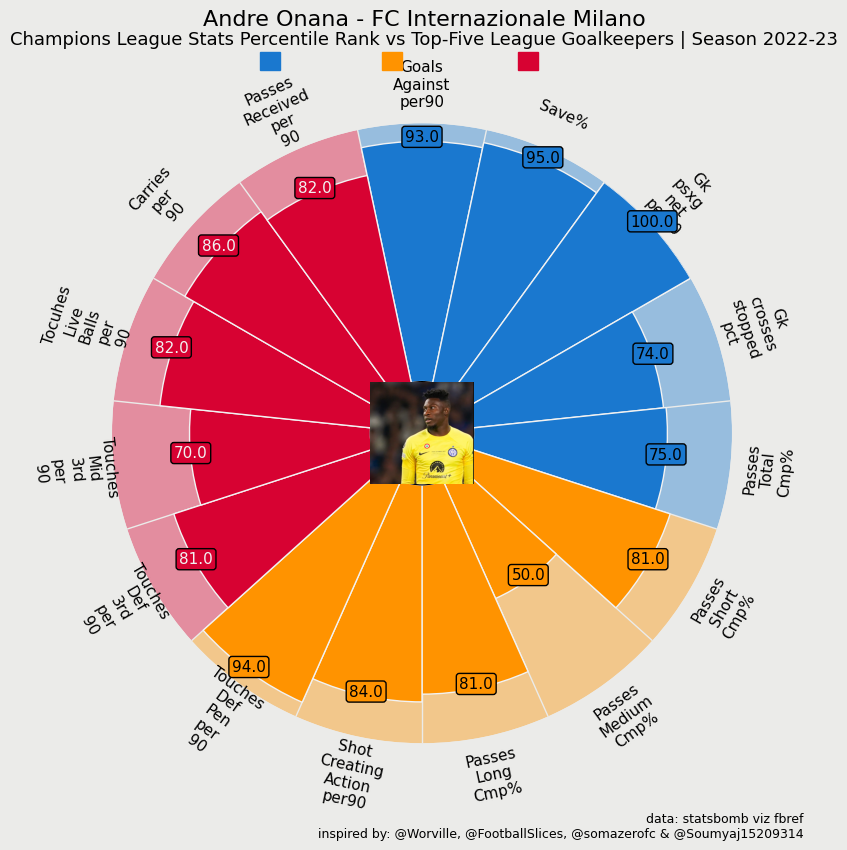

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Onv,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Andre Onana - FC Internazionale Milano", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Champions League Stats Percentile Rank vs Top-Five League Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.show()


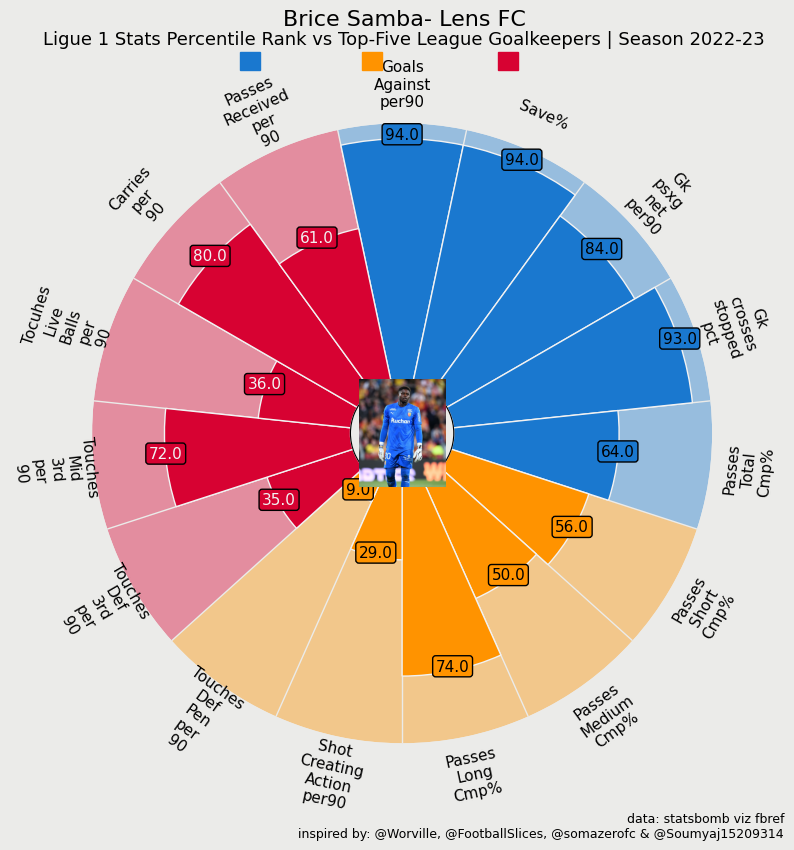

In [32]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Sv,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Brice Samba- Lens FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five League Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
dj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.show()


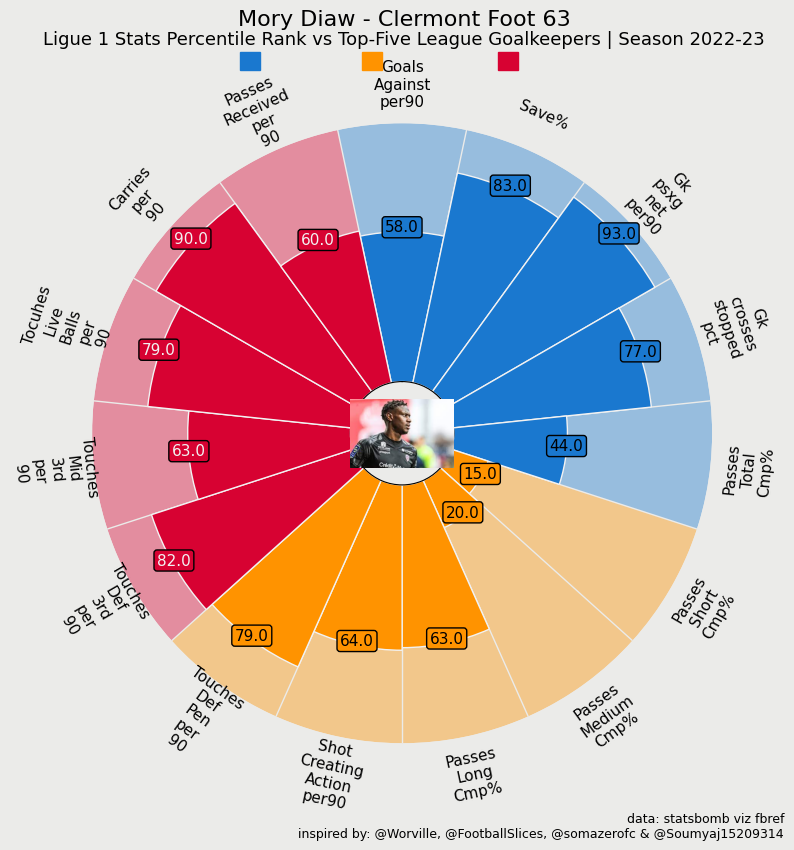

In [33]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Dv,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Mory Diaw - Clermont Foot 63", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five League Goalkeepers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
j_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.show()


In [34]:
# Get the names of newbie goalkeepers
newbie_goalkeepers_names = set(newbie['Player'])

# Filter out newbie goalkeepers from final_gk DataFrame
final = final_gk[~final_gk['Player'].isin(newbie_goalkeepers_names)]

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['Goals_Against', 'Goals_Against_per90',
        'Saves', 'Save%','Gk_free_kick_goals_against','Gk_corner_kick_goals_against', 
        'Gk_own_goals_against', 'Gk_psxg_diff','Gk_psxg_net_per90', 
        'Gk_passes_completed_launched','Gk_passes_attempted_launched',
        'Gk_passes_pct_launched', 'Gk_passes','Gk_passes_throws',
        'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
        'Passes_Total_Cmp','Passes_Total_Att', 'Passes_Total_Cmp%', 
        'Passes_TotDist','Passes_PrgDist', 'Passes_Short_Cmp', 
        'Passes_Short_Att','Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att','Passes_Medium_Cmp%', 'Passes_Long_Cmp', 
        'Passes_Long_Att','Passes_Long_Cmp%',  'Passes_1/3',
        'Shot_Creating_Action_per90', 'Goal_Creating_Action_per90',
        'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 
        'Carries_per_90','Passes_Received_per_90']

# Step 1: Standardize the data
scaler = StandardScaler()
final_gk_scaled = scaler.fit_transform(final[relevant_columns])
onana_scaled = scaler.transform(Onana[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Onana[relevant_columns], final[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(onana_scaled, final_gk_scaled.T)
magnitude_onana = np.linalg.norm(onana_scaled, axis=1, keepdims=True)
magnitude_final_gk = np.linalg.norm(final_gk_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_onana * magnitude_final_gk.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': final['Player'], 'Similarity': cosine_similarity_signed[0],'League':final['Comp'],'Squad':final['Squad'],'Age':final['Age'],'Seasons at top 5': final['Seasons at top 5'],'Seasons in PL': final['Seasons in PL'] ,'Seasons in Liga':final['Seasons in Liga'],'Seasons in Serie A':final['Seasons in Serie A'],'Seasons in Ligue 1': final['Seasons in Ligue 1'],'Seasons in Bundesliga':final['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Onana
most_similar_goalkeepers = similarity_df.head(5)

# Goalkeepers least similar to Onana
least_similar_goalkeepers = similarity_df.tail(5)

# Now you have the most similar and least similar goalkeepers to Onana based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.


In [36]:
similarity_df

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Yassine Bounou,0.481060,es La Liga,Sevilla,32.0,3,0,3,0,0,0
1,Frederik Rønnow,0.371118,de Bundesliga,Union Berlin+Schalke 04,29.0,2,0,0,0,0,2
2,Benjamin Lecomte,0.308116,es La Liga+fr Ligue 1+fr Ligue 1,Espanyol+Montpellier+Monaco,31.0,2,0,1,0,2,0
3,Steve Mandanda,0.303880,fr Ligue 1,Rennes+Marseille,37.0,2,0,0,0,2,0
4,David Raya,0.277282,eng Premier League,Brentford,26.0,2,2,0,0,0,0
5,Anthony Lopes,0.273568,fr Ligue 1,Lyon,32.0,3,0,0,0,3,0
6,Pau López,0.271323,it Serie A+fr Ligue 1,Roma+Marseille,28.0,3,0,0,1,2,0
7,Vanja Milinković-Savić,0.270383,it Serie A,Torino,25.0,2,0,0,2,0,0
8,Kasper Schmeichel,0.265026,eng Premier League+fr Ligue 1,Leicester City+Nice,36.0,3,2,0,0,1,0
9,Bartłomiej Drągowski,0.258671,it Serie A,Spezia+Fiorentina,24.0,2,0,0,2,0,0


In [37]:
final_gk[final_gk['Player']=='Yassine Bounou']

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
15,15,Yassine Bounou,ma MAR,GK,Sevilla,es La Liga,32.0,1991.0,89.0,89.0,7911.0,87.9,93.0,1.06,312.0,219.0,70.0,42.0,24.0,23.0,32.0,36.0,13.0,8.0,4.0,2.0,31.0,3.0,13.0,4.0,91.7,0.29,2.7,0.03,433.0,1062.0,41.0,2509.0,355.0,30.0,32.0,603.0,53.0,41.33,1178.0,73.0,6.0,58.0,1.1,45.2,319.0,741.0,2398.0,3117.0,77.0,66015.0,41116.0,391.0,392.0,100.0,1229.0,1248.0,98.0,774.0,1464.0,53.0,2,0.6,0.0,1.4,3.0,23.0,0.0,0.0,1.0,4.0,12.0,0.14,0.0,2839.0,3274.0,24.0,3297.0,1847.0,1729.0,32.3,37.25,0.27,0.05,21.01,19.67,3,0,3,0,0,0,0.05


In [38]:
final_gk[final_gk['Player']=='Frederik Rønnow']

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
80,80,Frederik Rønnow,dk DEN,GK,Union Berlin+Schalke 04,de Bundesliga,29.0,1992.0,40.0,39.0,3555.0,39.5,51.0,1.29,186.0,137.0,74.0,16.0,11.0,12.0,12.0,30.0,9.0,9.0,0.0,0.0,0.0,0.0,10.0,2.0,56.8,0.31,7.8,0.2,284.0,722.0,39.0,1395.0,176.0,41.0,33.2,258.0,59.0,44.05,566.0,51.0,9.0,42.0,1.06,13.85,151.0,570.0,1175.0,1660.0,71.0,34199.0,25795.0,206.0,207.0,100.0,581.0,583.0,100.0,383.0,857.0,45.0,1,0.0,0.2,1.0,1.0,70.0,3.0,0.0,0.0,3.0,31.0,0.78,0.0,1265.0,1742.0,24.0,1765.0,1069.0,899.0,32.03,44.1,0.61,0.08,27.06,22.76,2,0,0,0,0,2,0.08


In [39]:

df_goalkeepers = final.reset_index(drop=True)

df_goalkeepers = pd.concat([df_goalkeepers, Onana], ignore_index=True)


In [40]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
bounou_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[15]],0)

# Print the percentile ranks for Bounp
print(bounou_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
15                 16.0   72.0               73.0                    70.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
15               72.0               84.0                42.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
15              77.0                        70.0                    69.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
15                    62.0                    52.0                       97.0   

    Carries_per_90  Passes_Received_per_90  
15            62.0                    72.0  


In [41]:
Bv=[84.0,72.0,73.0,70.0,72.0,84.0,42.0, 77.0,70.0 , 69.0, 62.0 , 52.0 , 97.0,  62.0 ,72.0 ]

In [42]:
import pandas as pd





params=['Goals_Against_per90',
        'Save%','Gk_psxg_net_per90', 'Gk_crosses_stopped_pct', 'Passes_Total_Cmp%', 
       'Passes_Short_Cmp%', 'Passes_Medium_Cmp%','Passes_Long_Cmp%', 
        'Shot_Creating_Action_per90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 'Carries_per_90',
       'Passes_Received_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
goalkeepers_percentile_ranks = df_goalkeepers[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
fede_percentile_ranks = round(goalkeepers_percentile_ranks.iloc[[80]],0)

# Print the percentile ranks for Bounp
print(fede_percentile_ranks)


    Goals_Against_per90  Save%  Gk_psxg_net_per90  Gk_crosses_stopped_pct  \
80                 45.0   93.0               98.0                    98.0   

    Passes_Total_Cmp%  Passes_Short_Cmp%  Passes_Medium_Cmp%  \
80               47.0               84.0                99.0   

    Passes_Long_Cmp%  Shot_Creating_Action_per90  Touches_Def_Pen_per_90  \
80              39.0                       100.0                    67.0   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Tocuhes_Live_Balls_per_90  \
80                    93.0                    88.0                       99.0   

    Carries_per_90  Passes_Received_per_90  
80            91.0                    87.0  


In [43]:
Fv=[55.0,93.0,98.0,98.0,47.0,84.0,99.0,39.0,100.0,67.0, 93.0,88.0,99.0,91.0,87.0]


In [44]:


image_path = "bouno.jpg"
cropped = Image.open(image_path)


In [45]:


image_path = "Frede.jpg"
ropped = Image.open(image_path)


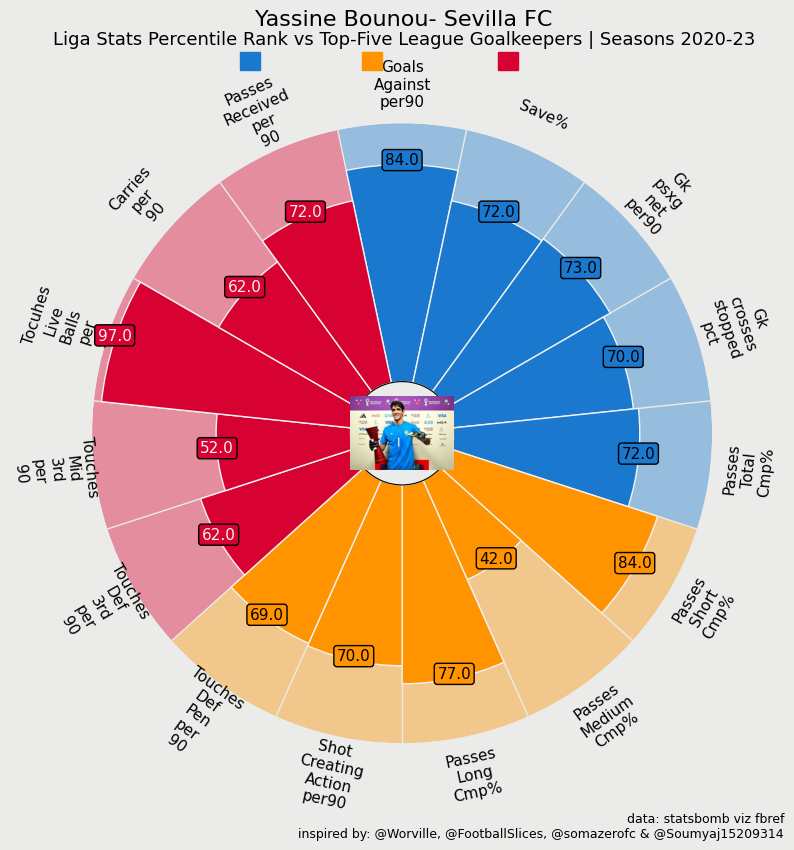

In [46]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Bv,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Yassine Bounou- Sevilla FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Liga Stats Percentile Rank vs Top-Five League Goalkeepers | Seasons 2020-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.show()


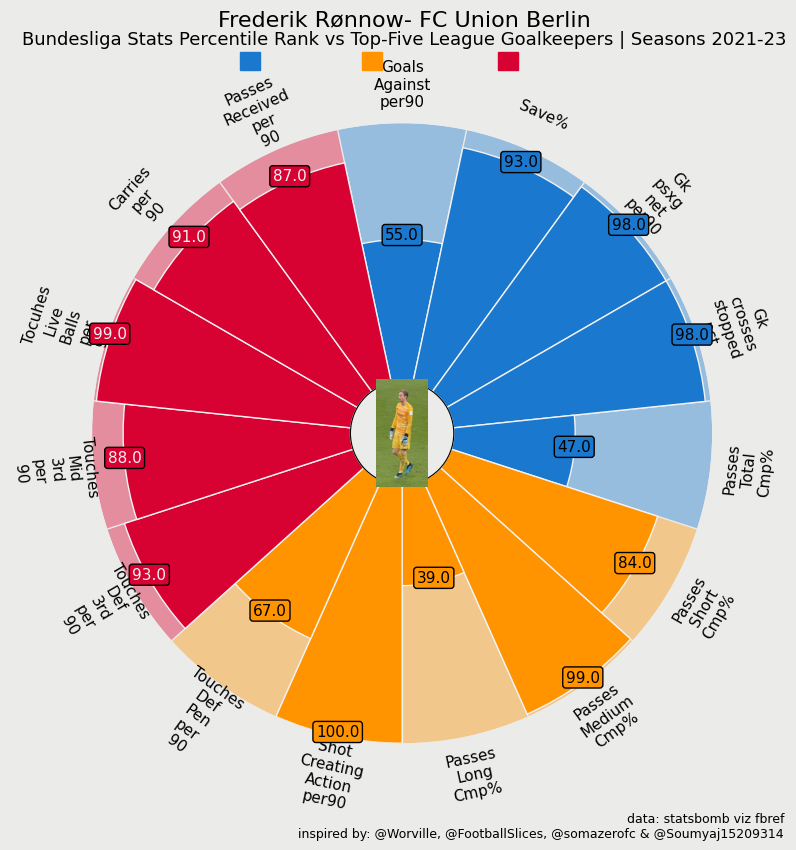

In [47]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Fv,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Frederik Rønnow- FC Union Berlin", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five League Goalkeepers | Seasons 2021-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
ropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

plt.show()
